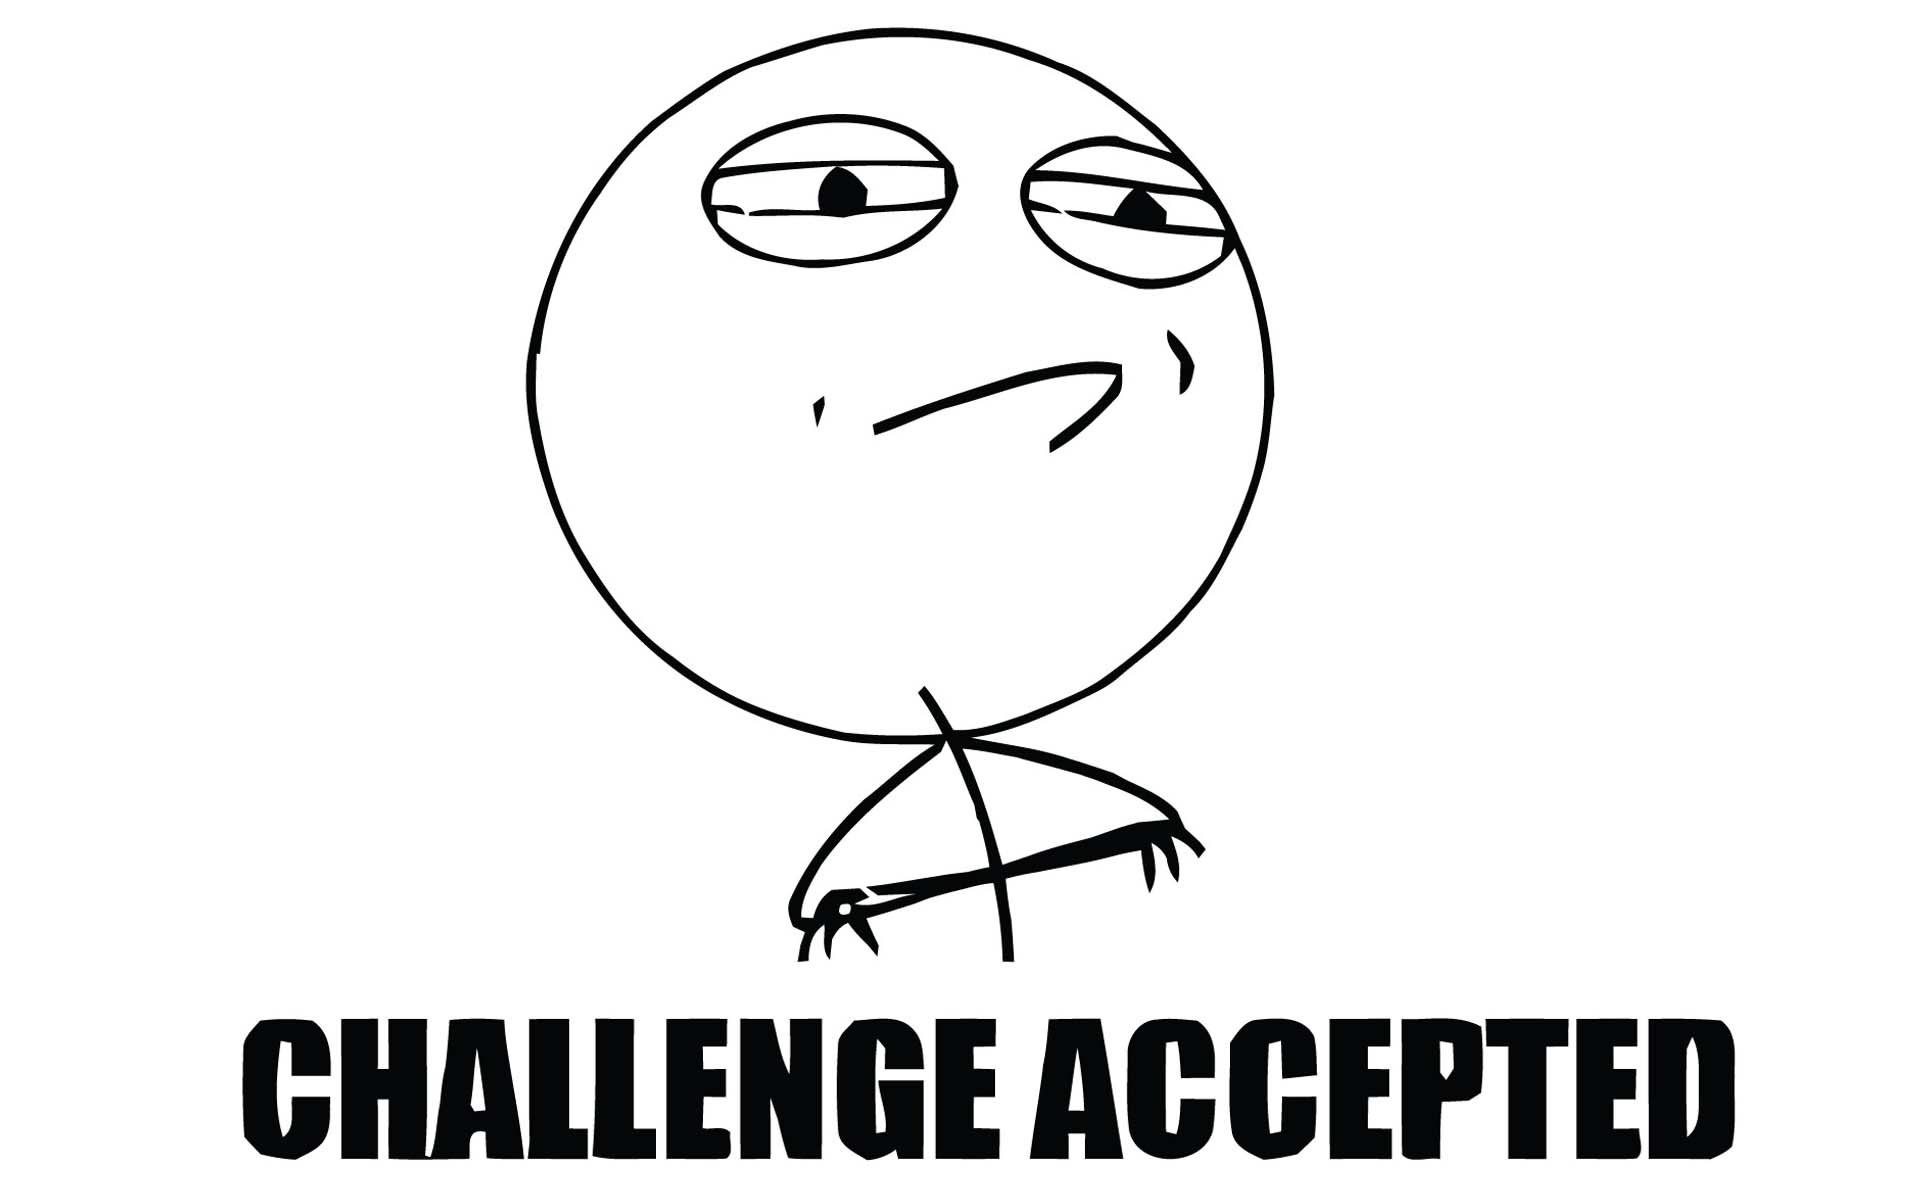

# Import Dependencies

In [1]:
%matplotlib inline
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt

In [2]:
import numpy as np
import pandas as pd

In [3]:
import datetime as dt

# Reflect Tables into SQLAlchemy ORM

In [4]:
# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func

In [5]:
engine = create_engine("sqlite:///hawaii.sqlite")

In [6]:
# reflect an existing database into a new model
Base = automap_base()
# reflect the tables
Base.prepare(engine, reflect=True)

In [7]:
# We can view all of the classes that automap found
Base.classes.keys()

['measurement', 'station']

In [8]:
# Save references to each table
Measurement = Base.classes.measurement
Station = Base.classes.station

In [9]:
# Create our session (link) from Python to the DB
session = Session(engine)

# Exploratory Climate Analysis

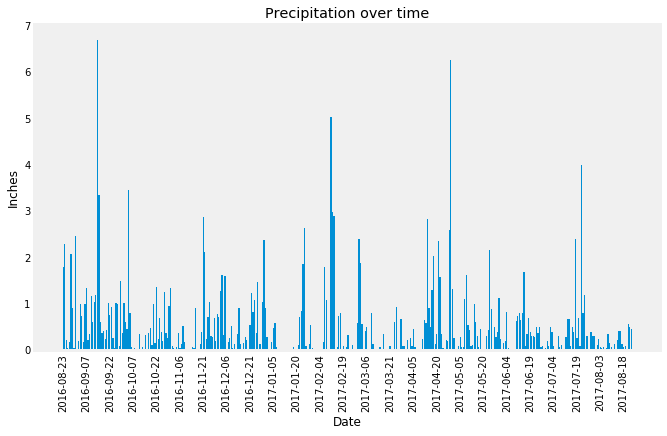

In [10]:
# Design a query to retrieve the last 12 months of precipitation data and plot the results


# Calculate the date 1 year ago from the last data point in the database

from datetime import datetime
max_date = pd.read_sql("select * from Measurement order by date desc",engine)['date'][:1][0]
max_date = datetime.strptime(max_date,'%Y-%m-%d')
query_date = max_date - dt.timedelta(days=365)
query_date = query_date.strftime('%Y-%m-%d')
query_date

# Perform a query to retrieve the data and precipitation scores

climate_db = pd.read_sql(f"select date,prcp from Measurement where date >= '{query_date}' order by date asc",engine)

# Save the query results as a Pandas DataFrame and set the index to the date column

climate_db = climate_db.set_index('date')

# Sort the dataframe by date

    #--------- Done in previous step

# Use Pandas Plotting with Matplotlib to plot the data

fig, axs = plt.subplots(figsize=(10,6))
axs.bar(climate_db.index,climate_db['prcp'])
plt.xticks(rotation=90)
plt.xlabel('Date')
plt.ylabel('Inches')
plt.title('Precipitation over time')
axs.set_xticks(axs.get_xticks()[::15])
plt.show()

In [11]:
# Use Pandas to calcualte the summary statistics for the precipitation data
climate_db['prcp'].describe()

count    2021.000000
mean        0.177279
std         0.461190
min         0.000000
25%         0.000000
50%         0.020000
75%         0.130000
max         6.700000
Name: prcp, dtype: float64

In [12]:
# Design a query to show how many stations are available in this dataset?
stations_db = pd.read_sql('select distinct station from Measurement',engine)
stations_db

,station
0,USC00519397
1,USC00513117
2,USC00514830
3,USC00517948
4,USC00518838
5,USC00519523
6,USC00519281
7,USC00511918
8,USC00516128


In [13]:
# What are the most active stations? (i.e. what stations have the most rows)?
# List the stations and the counts in descending order.
group_stations_db = pd.read_sql("select station, count(tobs) as count from Measurement group by station order by count desc ",engine)
group_stations_db

,station,count
0,USC00519281,2772
1,USC00519397,2724
2,USC00513117,2709
3,USC00519523,2669
4,USC00516128,2612
5,USC00514830,2202
6,USC00511918,1979
7,USC00517948,1372
8,USC00518838,511


In [14]:
# Using the station id from the previous query, calculate the lowest temperature recorded, 
# highest temperature recorded, and average temperature of the most active station?

from sqlalchemy.sql import func
qry = session.query(func.max(Measurement.tobs).label("max_score"), 
                func.min(Measurement.tobs).label("min_score"),
                func.avg(Measurement.tobs).label("avg_score")
                ).filter(Measurement.station == 'USC00519281')
res = qry.one()
max = res.max_score
min = res.min_score
avg = res.avg_score

print(f'The maximum observed temperature is {max}')
print(f'The minimum observed temperature is {min}')
print(f'The average observed temperature is {avg}')

The maximum observed temperature is 85.0
The minimum observed temperature is 54.0
The average observed temperature is 71.66378066378067


Text(0.5, 1.0, 'Temp')

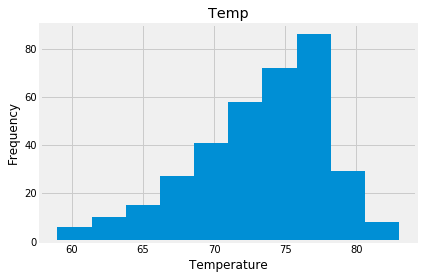

In [27]:
# Choose the station with the highest number of temperature observations.
# Query the last 12 months of temperature observation data for this station and plot the results as a histogram

qry = session.query(Measurement)\
.filter(Measurement.station == 'USC00519281')\
.filter(Measurement.date >= query_date)

t_obs=[]
for row in qry:
   t_obs.append(row.tobs)

plt.hist(t_obs)
plt.xlabel('Temperature')
plt.ylabel('Frequency')
plt.title('Temp')

## Bonus Challenge Assignment

In [26]:
# This function called `calc_temps` will accept start date and end date in the format '%Y-%m-%d' 
# and return the minimum, average, and maximum temperatures for that range of dates
def calc_temps(start_date, end_date):
    """TMIN, TAVG, and TMAX for a list of dates.
    
    Args:
        start_date (string): A date string in the format %Y-%m-%d
        end_date (string): A date string in the format %Y-%m-%d
        
    Returns:
        TMIN, TAVE, and TMAX
    """
    
    return session.query(func.min(Measurement.tobs), func.avg(Measurement.tobs), func.max(Measurement.tobs)).\
        filter(Measurement.date >= start_date).filter(Measurement.date <= end_date).all()

# function usage example
print(calc_temps('2012-02-28', '2012-03-05'))

[(62.0, 69.57142857142857, 74.0)]


In [ ]:
# Use your previous function `calc_temps` to calculate the tmin, tavg, and tmax 
# for your trip using the previous year's data for those same dates.


In [ ]:
# Plot the results from your previous query as a bar chart. 
# Use "Trip Avg Temp" as your Title
# Use the average temperature for the y value
# Use the peak-to-peak (tmax-tmin) value as the y error bar (yerr)


In [ ]:
# Calculate the total amount of rainfall per weather station for your trip dates using the previous year's matching dates.
# Sort this in descending order by precipitation amount and list the station, name, latitude, longitude, and elevation



In [ ]:
# Create a query that will calculate the daily normals 
# (i.e. the averages for tmin, tmax, and tavg for all historic data matching a specific month and day)

def daily_normals(date):
    """Daily Normals.
    
    Args:
        date (str): A date string in the format '%m-%d'
        
    Returns:
        A list of tuples containing the daily normals, tmin, tavg, and tmax
    
    """
    
    sel = [func.min(Measurement.tobs), func.avg(Measurement.tobs), func.max(Measurement.tobs)]
    return session.query(*sel).filter(func.strftime("%m-%d", Measurement.date) == date).all()
    
daily_normals("01-01")

In [ ]:
# calculate the daily normals for your trip
# push each tuple of calculations into a list called `normals`

# Set the start and end date of the trip

# Use the start and end date to create a range of dates

# Stip off the year and save a list of %m-%d strings

# Loop through the list of %m-%d strings and calculate the normals for each date


In [ ]:
# Load the previous query results into a Pandas DataFrame and add the `trip_dates` range as the `date` index


In [ ]:
# Plot the daily normals as an area plot with `stacked=False`
